In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import scipy as sp
import scipy.interpolate
import pandas as pd
import rwthcolors
import eurographics_style
import glob
import re

In [108]:
output_dir = '/local/born/layout-embedding-output'
optimization_pipeline_output_dir = output_dir + '/optimization_timeline'

In [109]:
ub_fns = glob.glob(optimization_pipeline_output_dir + '/*_upper_bound.csv')

runs = []

for fn in ub_fns:
    m = re.search('(\d+)_upper_bound\.csv', fn)
    seed = int(m.group(1))
    data = pd.read_csv(fn)
    num_events = len(data)
    run = {'seed': seed, 'num_events': num_events}
    runs.append(run)

runs = sorted(runs, key=lambda r: r['num_events'], reverse=True)
for run in runs[0:20]:
    seed = run['seed']
    num_events = run['num_events']
    print(f'Seed {seed}: {num_events} upper bound events')

Seed 578: 9 upper bound events
Seed 676: 8 upper bound events
Seed 667: 8 upper bound events
Seed 721: 8 upper bound events
Seed 490: 8 upper bound events
Seed 252: 8 upper bound events
Seed 146: 8 upper bound events
Seed 646: 7 upper bound events
Seed 31: 7 upper bound events
Seed 498: 7 upper bound events
Seed 339: 7 upper bound events
Seed 73: 7 upper bound events
Seed 495: 7 upper bound events
Seed 891: 7 upper bound events
Seed 271: 7 upper bound events
Seed 282: 7 upper bound events
Seed 70: 7 upper bound events
Seed 604: 7 upper bound events
Seed 183: 6 upper bound events
Seed 922: 6 upper bound events


In [114]:
def plot_run(lb_data, ub_data):
    min_t = min(lb_data['t'].min(), ub_data['t'].min())
    max_t = max(lb_data['t'].max(), ub_data['t'].max())
    
    lb_data = lb_data[lb_data['lower_bound'] > 0.0].copy()
    lb_data.iloc[-1, lb_data.columns.get_loc('lower_bound')] = ub_data.iloc[-1, ub_data.columns.get_loc('upper_bound')]
    
    lb_t = lb_data['t']
    ub_t = ub_data['t']
    lb = lb_data['lower_bound']
    ub = ub_data['upper_bound']
    
    t_resampled = np.sort(np.concatenate((lb_t, ub_t)))

    lb_interp = sp.interpolate.interp1d(lb_t, lb, kind='previous', fill_value='extrapolate')
    lb_resampled = lb_interp(t_resampled)

    ub_interp = sp.interpolate.interp1d(ub_t, ub, kind='previous', fill_value='extrapolate')
    ub_resampled = ub_interp(t_resampled)
    
    lb_resampled = np.minimum(lb_resampled, ub_resampled)
    lb = np.minimum(lb, ub_interp(lb_t))
    
    #plt.figure()
    plt.xlabel('Runtime (s)')
    plt.ylabel('Cost')

    plt.fill_between(t_resampled, lb_resampled, ub_resampled, color='rwth:blue10', step='post', zorder=-2.0)
    plt.step(t_resampled, ub_resampled, label='Global Upper Bound     ', c='rwth:blue', where='post', zorder=-0.0)
    plt.step(t_resampled, lb_resampled, label='Global Lower Bound     ', c='rwth:blue50', where='post', zorder=-1.0)
    

    point_size = 10.0
    #plt.scatter(lb_t, lb, c='rwth:blue50', s=point_size)
    plt.scatter(ub_t, ub, c='rwth:blue', s=point_size)
    #plt.ylim((10, 16))

    plt.legend()

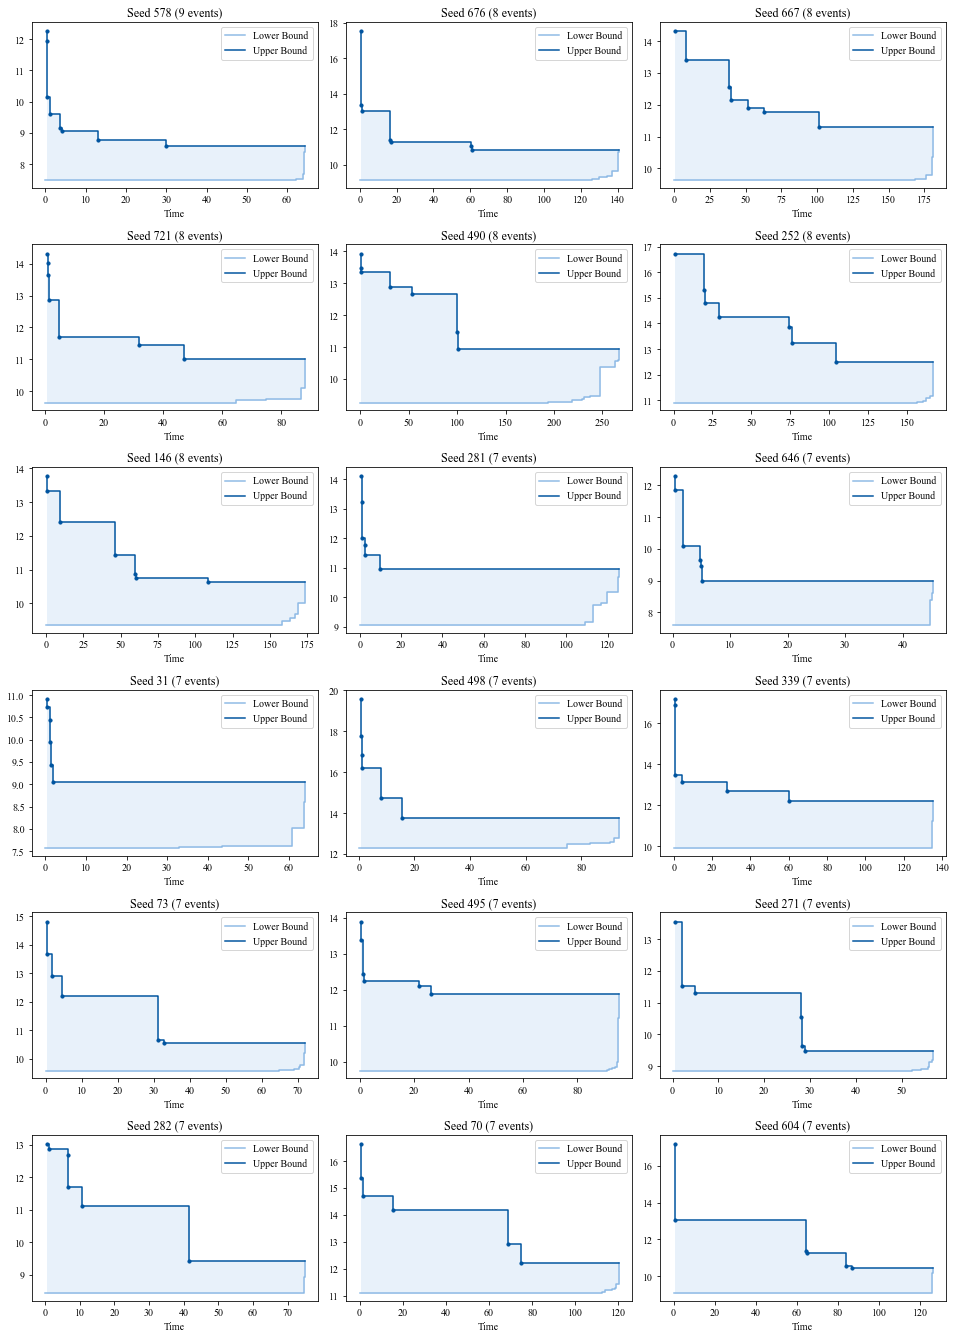

In [76]:
n_cols = 3
n_rows = 6
n_runs = n_cols * n_rows

runs = sorted(runs, key=lambda r: r['num_events'], reverse=True)
#plt.figure(figsize=(14,n_rows*4))
scale = 1.6
plt.figure(figsize=(8.27 * scale, 11.69 * scale)) # A4
for i, run in enumerate(runs[0:n_runs]):
    seed = run['seed']
    num_events = run['num_events']
    lb_fn = optimization_pipeline_output_dir + f'/{seed}_lower_bound.csv'
    ub_fn = optimization_pipeline_output_dir + f'/{seed}_upper_bound.csv'
    lb_data = pd.read_csv(lb_fn)
    ub_data = pd.read_csv(ub_fn)
    plt.subplot(n_rows, n_cols, i+1)
    plt.title(f'Seed {seed} ({num_events} events)')
    plot_run(lb_data, ub_data)
plt.tight_layout()

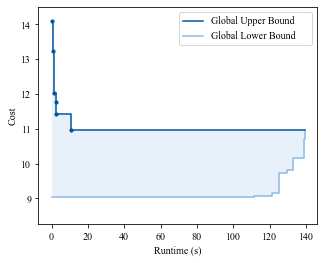

In [115]:
seed = 281
lb_fn = optimization_pipeline_output_dir + f'/{seed}_lower_bound.csv'
ub_fn = optimization_pipeline_output_dir + f'/{seed}_upper_bound.csv'
lb_data = pd.read_csv(lb_fn)
ub_data = pd.read_csv(ub_fn)
plt.figure(figsize=(5,4))
#plt.title(f'Seed {seed} ({num_events} events)')
plot_run(lb_data, ub_data)
plt.ylim((8.25,14.5))
plt.savefig('/home/born/projects/layouts/layout-embedding-paper/img/optimization-timeline/optimization-timeline-plot.pdf')